In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


dat=pd.read_csv("D:\OldPC\Plotting\Inputs\MetricsDissolvedPart.csv")
dat=dat[dat['Non flow']!=0]
dat=dat.reset_index()
dat=dat.drop(columns='index')
# print(dat)

C:\Users\A ayush\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
print("x\u2071")
print(ord('²'))
print(chr(8315)+chr(185))

xⁱ
178
⁻¹


In [3]:
# print(dat)
mysch = [0,3,8]

caltimes = ['Less than '+str(mysch[1]),str(mysch[1])+' to '+str(mysch[2]),'More than '+str(mysch[2])]


def assign_values(row):
    if mysch[0] <= row['ActualCal'] < mysch[1]:
        return 'Less than '+str(mysch[1])
    elif mysch[1] <= row['ActualCal'] < mysch[2]:
        return str(mysch[1])+' to '+str(mysch[2])
    elif mysch[2] <= row['ActualCal'] :
        return 'More than '+str(mysch[2])
    else:
        return np.nan

dat['Cal time'] = dat.apply(assign_values, axis=1)



Plot for Sub-daily, daily or Monthly


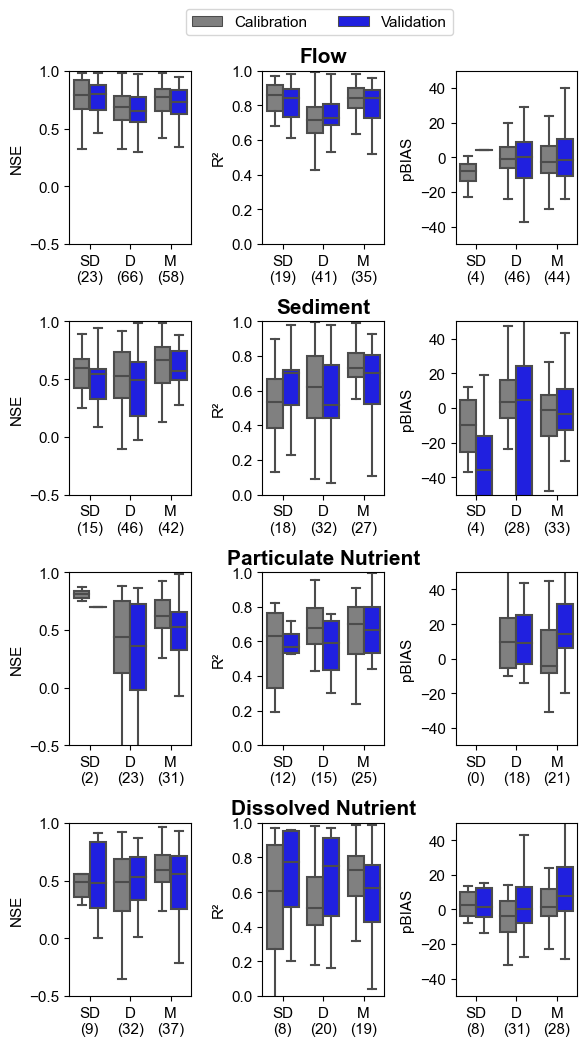

Plot for different years of calibration time


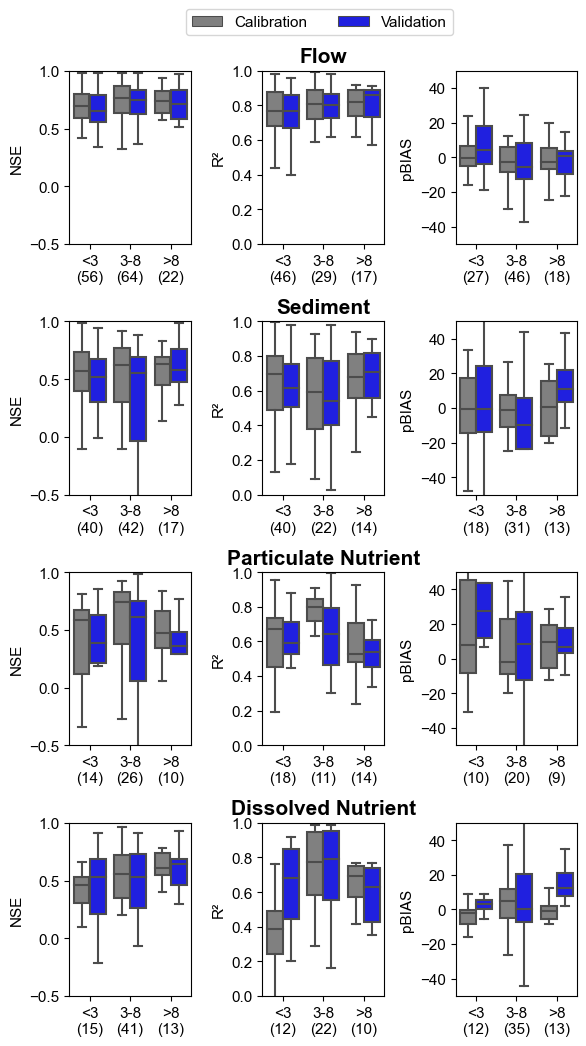

Plot for different loading types


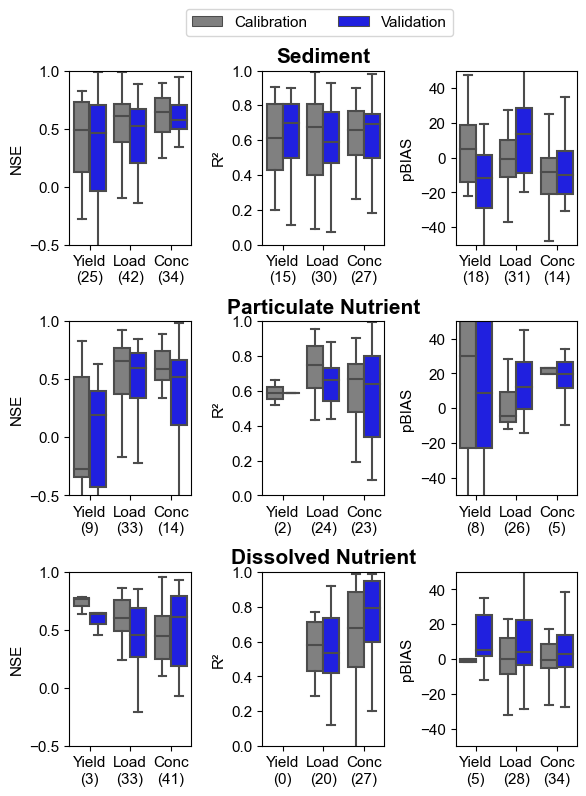

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the default font family to Arial
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11


calcolor='grey'
valcolor='blue'

# SD/D/M
print("Plot for Sub-daily, daily or Monthly")
column = 'Sim'
WQpara = ['Flow','Sediment', 'Particulate', 'Dissolved']
metric_list = ['NSE', 'R2','pBIAS']
ymin = 0
ymax = 1
kx=0
ky=0
fig, ax = plt.subplots(4, 3, figsize=(6, 10.5))
for i, param in enumerate(WQpara):
    for j, metric in enumerate(metric_list):
        if(metric=='NSE'):
            ymin=-0.5
            ymax=1
        if(metric=='R2'):
            ymin=0
            ymax=1
        if(metric=='RSR'):
            ymin=0
            ymax=1
        if(metric=='pBIAS'):
            ymin=-50
            ymax=50
        CheckCol = param + ' (' + metric + ')Cal'
        CheckColVal = param + ' (' + metric + ')Val'
        loadingcol = param + ' (' + metric + ')C or L?'
        RepCol=column
        filter_dat = dat.query("`{}` != 'NA'".format(CheckCol))
        count_df = filter_dat.groupby(RepCol)[CheckCol].nunique().reset_index(name='count_nse')
        replace_list = count_df[count_df['count_nse'] <= 1][RepCol].tolist()
        filter_dat.loc[filter_dat[RepCol].isin(replace_list),RepCol] = 'Others'
        if (column=='Sim'):
            order = ['Sub-Daily', 'Daily', 'Monthly']
            filter_dat[column] = pd.Categorical(filter_dat[column], categories=order, ordered=True)
        df_melt = pd.melt(filter_dat, id_vars=[RepCol], value_vars=[CheckCol, CheckColVal], var_name='Dataset', value_name=metric)
        colors = {CheckCol: calcolor, CheckColVal: valcolor}
        StudyCount=(df_melt[(df_melt['Dataset']==CheckCol) & (~np.isnan(df_melt[metric]))][column].value_counts())
#         print(df_melt)
        sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
        ax[ky,kx].set_xticklabels(['SD'+'\n('+StudyCount['Sub-Daily'].astype(str)+')', 'D'+'\n('+StudyCount['Daily'].astype(str)+')', 'M'+'\n('+StudyCount['Monthly'].astype(str)+')'])
        ax[ky,kx].set_ylim(ymin, ymax)
        ax[ky,kx].set_xlabel('')
        if(metric=='R2'):
            ax[ky,kx].set_ylabel('R\u00b2')
        else:
            ax[ky,kx].set_ylabel(metric)            
        ax[ky,kx].legend_.remove()
        if param != 'Flow' and param !='Sediment':
            param_temp = param + ' Nutrient'
        else:
            param_temp = param
            
        if(j==1):ax[ky,kx].set_title(param_temp, fontweight='bold', fontsize=15)
        kx=kx+1
        if(kx==3):
            kx=0
            ky=ky+1
plt.tight_layout()
handles, labels = ax[-1,-1].get_legend_handles_labels()
fig.legend(handles, ['Calibration','Validation'], loc='upper center',  ncol=2, bbox_to_anchor=(0.543, 1.001))
plt.subplots_adjust(top=0.935)
# plt.savefig("D:\\temp\\SimulationTime.svg")
plt.show()

print("Plot for different years of calibration time")
## Calibration time
column = 'Cal time'
WQpara = ['Flow','Sediment', 'Particulate', 'Dissolved']
metric_list = ['NSE', 'R2','pBIAS']
ymin = 0
ymax = 1
kx=0
ky=0
fig, ax = plt.subplots(4, 3, figsize=(6, 10.5))
for i, param in enumerate(WQpara):
    for j, metric in enumerate(metric_list):
        if(metric=='NSE'):
            ymin=-0.5
            ymax=1
        if(metric=='R2'):
            ymin=0
            ymax=1
        if(metric=='RSR'):
            ymin=0
            ymax=1
        if(metric=='pBIAS'):
            ymin=-50
            ymax=50
        CheckCol = param + ' (' + metric + ')Cal'
        CheckColVal = param + ' (' + metric + ')Val'
        loadingcol = param + ' (' + metric + ')C or L?'
        RepCol=column
        filter_dat = dat.query("`{}` != 'NA'".format(CheckCol))
        count_df = filter_dat.groupby(RepCol)[CheckCol].nunique().reset_index(name='count_nse')
        
        replace_list = count_df[count_df['count_nse'] <= 1][RepCol].tolist()
        filter_dat.loc[filter_dat[RepCol].isin(replace_list),RepCol] = 'Others'
#         order = ['Less than 5','5 to 15', 'More than 15']
        order = caltimes
        filter_dat[column] = pd.Categorical(filter_dat[column], categories=order, ordered=True)
        df_melt = pd.melt(filter_dat, id_vars=[RepCol], value_vars=[CheckCol, CheckColVal], var_name='Dataset', value_name=metric)

        colors = {CheckCol: calcolor, CheckColVal: valcolor}
        StudyCount=(df_melt[(df_melt['Dataset']==CheckCol) & (~np.isnan(df_melt[metric]))][column].value_counts())       
        sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
        ax[ky,kx].set_xticklabels(['<'+str(mysch[1])+'\n('+StudyCount[caltimes[0]].astype(str)+')', str(mysch[1])+'-'+str(mysch[2])+'\n('+StudyCount[caltimes[1]].astype(str)+')', '>'+str(mysch[2])+'\n('+StudyCount[caltimes[2]].astype(str)+')'])
        ax[ky,kx].set_ylim(ymin, ymax)
        ax[ky,kx].set_xlabel('')
        if(metric=='R2'):
            ax[ky,kx].set_ylabel('R\u00b2')
        else:
            ax[ky,kx].set_ylabel(metric) 
        ax[ky,kx].legend_.remove()
        if param != 'Flow' and param !='Sediment':
            param_temp = param + ' Nutrient'
        else:
            param_temp = param
            
        if(j==1):ax[ky,kx].set_title(param_temp, fontweight='bold', fontsize=15)
        kx=kx+1
        if(kx==3):
            kx=0
            ky=ky+1
plt.tight_layout()
handles, labels = ax[-1,-1].get_legend_handles_labels()
fig.legend(handles, ['Calibration','Validation'], loc='upper center',  ncol=2, bbox_to_anchor=(0.543, 1.001))
plt.subplots_adjust(top=0.935)
# plt.savefig("D:\\temp\\CalibrationYears.svg")
plt.show()
print('Plot for different loading types')

# Yield Load Concentration
WQpara = ['Sediment','Particulate', 'Dissolved']
metric_list = ['NSE', 'R2','pBIAS']
ymin = 0
ymax = 1
kx=0
ky=0
fig, ax = plt.subplots(3, 3, figsize=(6, 8))
for i, param in enumerate(WQpara):
    for j, metric in enumerate(metric_list):
        if(metric=='NSE'):
            ymin=-0.5
            ymax=1
        if(metric=='R2'):
            ymin=0
            ymax=1
        if(metric=='RSR'):
            ymin=0
            ymax=1
        if(metric=='pBIAS'):
            ymin=-50
            ymax=50
        CheckCol = param + ' (' + metric + ')Cal'
        CheckColVal = param + ' (' + metric + ')Val'
        loadingcol = param + ' (' + metric + ')C or L?'
        column = loadingcol
        RepCol=column
        filter_dat = dat.query("`{}` != 'NA'".format(CheckCol))
        count_df = filter_dat.groupby(RepCol)[CheckCol].nunique().reset_index(name='count_nse')
        replace_list = count_df[count_df['count_nse'] <= 1][RepCol].tolist()
        order = ['Yield', 'Load', 'Concentration']
        filter_dat[column] = pd.Categorical(filter_dat[column], categories=order, ordered=True)
        df_melt = pd.melt(filter_dat, id_vars=[RepCol], value_vars=[CheckCol, CheckColVal], var_name='Dataset', value_name=metric)
        colors = {CheckCol: calcolor, CheckColVal: valcolor}
        StudyCount=(df_melt[(df_melt['Dataset']==CheckCol) & (~np.isnan(df_melt[metric]))][column].value_counts())       

        sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
        ax[ky,kx].set_xticklabels(['Yield'+'\n('+StudyCount['Yield'].astype(str)+')', 'Load'+'\n('+StudyCount['Load'].astype(str)+')', 'Conc'+'\n('+StudyCount['Concentration'].astype(str)+')'])

        ax[ky,kx].set_ylim(ymin, ymax)
        ax[ky,kx].set_xlabel('')
        if(metric=='R2'):
            ax[ky,kx].set_ylabel('R\u00b2')
        else:
            ax[ky,kx].set_ylabel(metric) 
        ax[ky,kx].legend_.remove()
        if param != 'Flow' and param !='Sediment':
            param_temp = param + ' Nutrient'
        else:
            param_temp = param
        if(j==1):ax[ky,kx].set_title(param_temp, fontweight='bold', fontsize=15)
        kx=kx+1
        if(kx==3):
            kx=0
            ky=ky+1
plt.tight_layout()
handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, ['Calibration','Validation'], loc='upper center',  ncol=2, bbox_to_anchor=(0.543, 1.001))
plt.subplots_adjust(top=0.915)
# ax[1][3].axis('off')
# ax[1][4].axis('off')
# ax[1][5].axis('off')
# Save the figure
# plt.savefig("D:\\temp\\Loading.svg")
plt.show()





Plot for different years of calibration time
Flow	NSE
Spread
0.6
0.633
0.415
-30.83 %


Flow	R2
Spread
0.55
0.38
0.32
-41.82 %


Flow	pBIAS
Spread
49.45
51.53
40.355
-18.39 %


Sediment	NSE
Spread
1.02
1.315
0.703
-31.08 %


Sediment	R2
Spread
0.832
0.895
0.572
-31.25 %


Sediment	pBIAS
Spread
102.61
59.575
50.235
-51.04 %


Particulate	NSE
Spread
0.905
1.42
0.628
-30.61 %


Particulate	R2
Spread
0.6
0.486
0.538
-10.33 %


Particulate	pBIAS
Spread
77.185
101.205
42.71
-44.67 %


Dissolved	NSE
Spread
0.84
0.867
0.505
-39.88 %


Dissolved	R2
Spread
0.802
0.765
0.388
-51.62 %


Dissolved	pBIAS
Spread
19.72
83.2
26.8
35.9 %




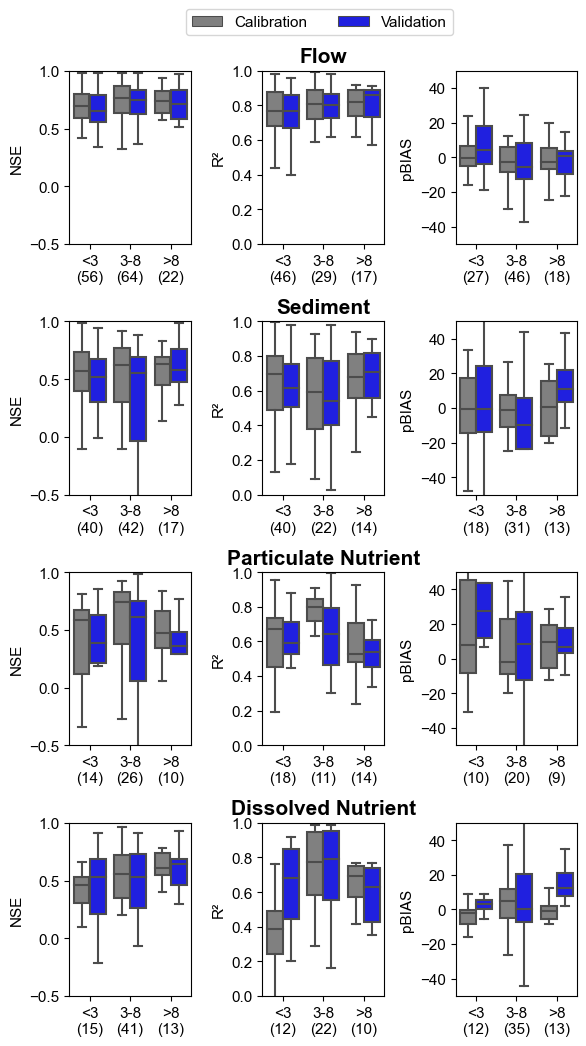

In [171]:
print("Plot for different years of calibration time")
## Calibration time
column = 'Cal time'
WQpara = ['Flow','Sediment', 'Particulate', 'Dissolved']
metric_list = ['NSE', 'R2','pBIAS']
ymin = 0
ymax = 1
kx=0
ky=0
fig, ax = plt.subplots(4, 3, figsize=(6, 10.5))
for i, param in enumerate(WQpara):
    for j, metric in enumerate(metric_list):
        if(metric=='NSE'):
            ymin=-0.5
            ymax=1
        if(metric=='R2'):
            ymin=0
            ymax=1
        if(metric=='RSR'):
            ymin=0
            ymax=1
        if(metric=='pBIAS'):
            ymin=-50
            ymax=50
        CheckCol = param + ' (' + metric + ')Cal'
        CheckColVal = param + ' (' + metric + ')Val'
        loadingcol = param + ' (' + metric + ')C or L?'
        RepCol=column
        filter_dat = dat.query("`{}` != 'NA'".format(CheckCol))
        count_df = filter_dat.groupby(RepCol)[CheckCol].nunique().reset_index(name='count_nse')
        
        replace_list = count_df[count_df['count_nse'] <= 1][RepCol].tolist()
        filter_dat.loc[filter_dat[RepCol].isin(replace_list),RepCol] = 'Others'
#         order = ['Less than 5','5 to 15', 'More than 15']
        order = caltimes
        filter_dat[column] = pd.Categorical(filter_dat[column], categories=order, ordered=True)
        df_melt = pd.melt(filter_dat, id_vars=[RepCol], value_vars=[CheckCol, CheckColVal], var_name='Dataset', value_name=metric)

        colors = {CheckCol: calcolor, CheckColVal: valcolor}
        StudyCount=(df_melt[(df_melt['Dataset']==CheckCol) & (~np.isnan(df_melt[metric]))][column].value_counts())       
        sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
        
#         if (metric in ["pBIAS"] and param in ["Sediment"]):
        temp = ax[ky,kx]
#         temp = sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
#         print(temp.lines[0]._y[1])
#         print(temp.lines[1]._y[1])
#         print('Spread = ',(temp.lines[1]._y[1]) - (temp.lines[0]._y[1]))
        print(param+'\t'+metric)
        print('Spread')
        a1 = (temp.lines[3]._y[1] -temp.lines[2]._y[1] )
        a2 = (temp.lines[8]._y[1] - temp.lines[7]._y[1])
        b1 = (temp.lines[13]._y[1] - temp.lines[12]._y[1])
        b2 = (temp.lines[18]._y[1] - temp.lines[17]._y[1])
        c1 = (temp.lines[23]._y[1] - temp.lines[22]._y[1])
        c2 = (temp.lines[28]._y[1] - temp.lines[27]._y[1])
        
        t1 = np.round((a1+a2)/2,3)
        t2 = np.round((b1+b2)/2,3)
        t3 = np.round((c1+c2)/2,3)
        print(np.round((a1+a2)/2,3))
        print(np.round((b1+b2)/2,3))
        print(np.round((c1+c2)/2,3))
        print(np.round((t3-t1)/t1*100,2),"%")
        
        print('\n')

#             print(temp.lines[2]._y[1])
#             print(temp.lines[3]._y[1])
#             print(temp.lines[7]._y[1])
#             print(temp.lines[8]._y[1])
#             print(temp.lines[12]._y[1])
#             print(temp.lines[13]._y[1])
#             print(temp.lines[17]._y[1])
#             print(temp.lines[18]._y[1])
#             print(temp.lines[22]._y[1])
#             print(temp.lines[23]._y[1])
#             print(temp.lines[27]._y[1])
#             print(temp.lines[28]._y[1])

        ax[ky,kx].set_xticklabels(['<'+str(mysch[1])+'\n('+StudyCount[caltimes[0]].astype(str)+')', str(mysch[1])+'-'+str(mysch[2])+'\n('+StudyCount[caltimes[1]].astype(str)+')', '>'+str(mysch[2])+'\n('+StudyCount[caltimes[2]].astype(str)+')'])
        ax[ky,kx].set_ylim(ymin, ymax)
        ax[ky,kx].set_xlabel('')
        if(metric=='R2'):
            ax[ky,kx].set_ylabel('R\u00b2')
        else:
            ax[ky,kx].set_ylabel(metric) 
        ax[ky,kx].legend_.remove()
        if param != 'Flow' and param !='Sediment':
            param_temp = param + ' Nutrient'
        else:
            param_temp = param
            
        if(j==1):ax[ky,kx].set_title(param_temp, fontweight='bold', fontsize=15)
        kx=kx+1
        if(kx==3):
            kx=0
            ky=ky+1
plt.tight_layout()
handles, labels = ax[-1,-1].get_legend_handles_labels()
fig.legend(handles, ['Calibration','Validation'], loc='upper center',  ncol=2, bbox_to_anchor=(0.543, 1.001))
plt.subplots_adjust(top=0.935)
# plt.savefig("D:\\temp\\CalibrationYears.svg")
plt.show()

In [176]:

#Concentration
metr='NSE'
par='Flow'
for par in ['Flow','Sediment','Particulate','Dissolved']:
    
    for metr in ['NSE', 'R2', 'pBIAS']:
        print(par + '\t'+ metr)
        idx = []
        for i in ['Sub-Daily','Daily','Monthly']:
            
            mydat=(dat[dat['Sim']==i][par+' ('+metr+')Cal'])
            mydat1=(dat[dat['Sim']==i][par+' ('+metr+')Val'])
            if (metr == 'pBIAS'):
#                 print('Median')
                print((np.abs(mydat.describe()["50%"])+np.abs(mydat1.describe()["50%"]))/2)
                idx.append((np.abs(mydat.describe()["50%"])+np.abs(mydat1.describe()["50%"]))/2)
            else:
#                 print('Median')
                print(((mydat.describe()["50%"])+(mydat1.describe()["50%"]))/2)
                idx.append((np.abs(mydat.describe()["50%"])+np.abs(mydat1.describe()["50%"]))/2)
        print(np.round((idx[2]-idx[0])/idx[0]*100,2),"%")

        #     print("Range = ",mydat.describe().max()-mydat.describe().min())
#             IQRcal=mydat.describe()["75%"]-mydat.describe()["25%"]
#             IQRval=mydat1.describe()["75%"]-mydat1.describe()["25%"]
#             avgrange = (mydat.describe()["75%"]-mydat.describe()["25%"]+3*IQRcal)/2 + (mydat1.describe()["75%"]-mydat1.describe()["25%"]+3*IQRval)/2
#             print("Range = ",np.round(avgrange,2))
#             print("Upper Cal range =",min(mydat.describe()["max"],np.round(mydat.describe()["75%"]+1.5*IQRcal,2)))
#             print("Lower Cal range =",max(mydat.describe()["min"],np.round(mydat.describe()["25%"]-1.5*IQRcal,2)))
#             print("Upper Val range =",np.round(mydat1.describe()["75%"]+1.5*IQRval,2))
#             print("Upper Val range =",np.round(mydat1.describe()["25%"]-1.5*IQRval,2))
        print("\n")

#     print('Median:',mydat.median())


Flow	NSE
0.795
0.6699999999999999
0.7515000000000001
-5.47 %


Flow	R2
0.85
0.72133333325
0.84125
-1.03 %


Flow	pBIAS
6.102
0.6425
2.1325
-65.05 %


Sediment	NSE
0.569
0.51
0.62
8.96 %


Sediment	R2
0.6174999999999999
0.5700000000000001
0.715
15.79 %


Sediment	pBIAS
22.93375
3.8874999999999997
2.275
-90.08 %


Particulate	NSE
0.7525
0.4
0.57125
-24.09 %


Particulate	R2
0.6000000000000001
0.635
0.68375
13.96 %


Particulate	pBIAS
nan
9.35875
9.254999999999999
nan %


Dissolved	NSE
0.4825
0.51
0.575
19.17 %


Dissolved	R2
0.6912499999999999
0.63
0.6775
-1.99 %


Dissolved	pBIAS
1.7925
2.0675
4.49
150.49 %




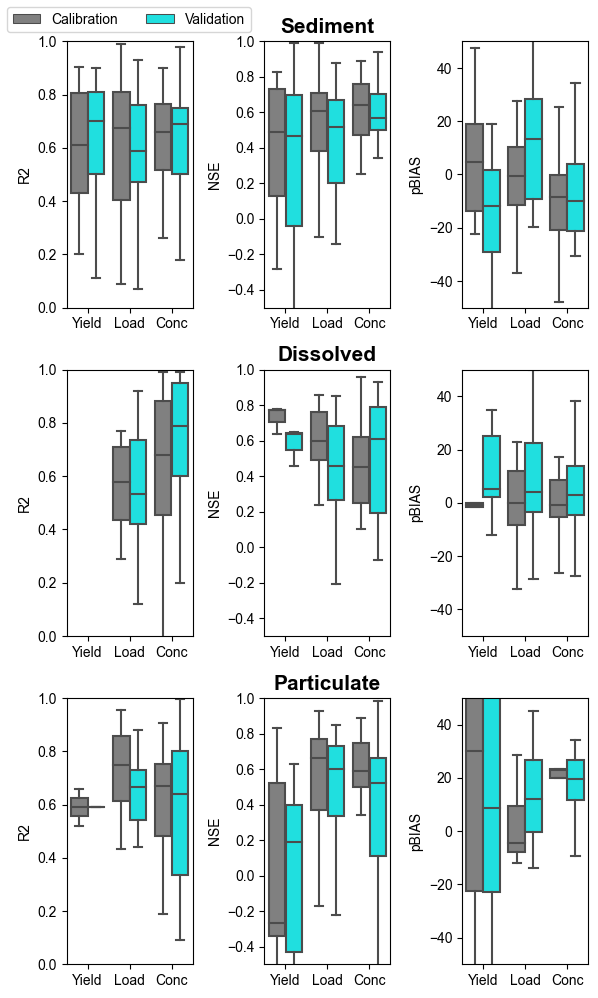

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the default font family to Arial
mpl.rcParams['font.family'] = 'Arial'






# Define common variables
WQpara = ['Sediment', 'Dissolved', 'Particulate']
metric_list = ['R2', 'NSE','pBIAS']
ymin = 0
ymax = 1

kx=0
ky=0
# Create a figure and axes objects
fig, ax = plt.subplots(3, 3, figsize=(6, 10))
for i, param in enumerate(WQpara):
    for j, metric in enumerate(metric_list):
        if(metric=='NSE'):
            ymin=-0.5
            ymax=1

        if(metric=='R2'):
            ymin=0
            ymax=1

        if(metric=='RSR'):
            ymin=0
            ymax=1

        if(metric=='pBIAS'):
            ymin=-50
            ymax=50

        # Construct the column names based on the metric
        CheckCol = param + ' (' + metric + ')Cal'
        CheckColVal = param + ' (' + metric + ')Val'
        loadingcol = param + ' (' + metric + ')C or L?'
        column = loadingcol
        RepCol=column
        # Filter the data
        filter_dat = dat.query("`{}` != 'NA'".format(CheckCol))

        count_df = filter_dat.groupby(RepCol)[CheckCol].nunique().reset_index(name='count_nse')
        replace_list = count_df[count_df['count_nse'] <= 1][RepCol].tolist()

        order = ['Yield', 'Load', 'Concentration']
        filter_dat[column] = pd.Categorical(filter_dat[column], categories=order, ordered=True)
        # Melt the data for plotting
        df_melt = pd.melt(filter_dat, id_vars=[RepCol], value_vars=[CheckCol, CheckColVal], var_name='Dataset', value_name=metric)

        # Define the color palette
        colors = {CheckCol: 'grey', CheckColVal: 'cyan'}
        
        # Plot the boxplot on the respective subplot
        sns.boxplot(data=df_melt, x=column, y=metric, hue='Dataset', palette=colors, showfliers=False, ax=ax[ky,kx])
        ax[ky,kx].set_xticklabels(['Yield', 'Load', 'Conc'])
        ax[ky,kx].set_ylim(ymin, ymax)
        ax[ky,kx].set_xlabel('')
        ax[ky,kx].set_ylabel(metric)
        ax[ky,kx].legend_.remove()
        if(j==1):ax[ky,kx].set_title(param, fontweight='bold', fontsize=15)
        kx=kx+1
        if(kx==3):
            kx=0
            ky=ky+1
# Adjust spacing between subplots
plt.tight_layout()
handles, labels = ax[1,1].get_legend_handles_labels()
fig.legend(handles, ['Calibration','Validation'], loc='upper left',  ncol=2)
# ax[1][3].axis('off')
# ax[1][4].axis('off')
# ax[1][5].axis('off')
# Save the figure
# plt.savefig("D:\\Plotting\\Output\\Loading.svg")

# Display the figure
plt.show()


In [97]:
# from matplotlib.patches import Rectangle, PathPatch
# print(ax[ky,kx].patches)
# for i in ax[ky,kx].patches:
#     print(i)
#     if not (isinstance(i, Rectangle)):
# #         print(vars(i))
#         print(i._path.vertices)
#         break
print(temp)
# print(vars(temp))
for i in temp.patches:
    if not (isinstance(i, Rectangle)):
        print(vars(i))
        break

AxesSubplot(0.126505,0.769955;0.202384x0.165045)
{'_stale': False, 'stale_callback': <function _stale_axes_callback at 0x0000021157637250>, '_axes': <AxesSubplot: ylabel='NSE'>, 'figure': <Figure size 600x1050 with 12 Axes>, '_transform': <matplotlib.transforms.CompositeGenericTransform object at 0x000002115DD784F0>, '_transformSet': True, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': <matplotlib.transforms.TransformedBbox object at 0x000002115E3EBA60>, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_rasterized': False, '_agg_filter': None, '_mouseover': False, '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x000002115E3EB220>, '_remove_method': <built-in method remove of list object at 0x000002115D6E99C0>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_hatch_color': (0.2980392156862745, 0.2980392156862745, 0.2980392156862745, 1.0), '_fill': 

In [148]:
print(temp.lines)
print(temp.lines[2]._y[1])
print(temp.lines[3]._y[1])
print('Spread')

print(temp.lines[7]._y[1])
print(temp.lines[8]._y[1])



print(temp.lines[12]._y[1])
print(temp.lines[13]._y[1])

print(temp.lines[17]._y[1])
print(temp.lines[18]._y[1])



print(temp.lines[22]._y[1])
print(temp.lines[23]._y[1])

print(temp.lines[27]._y[1])
print(temp.lines[28]._y[1])



# print(temp.lines[21]._y[1])
# print(temp.lines[22]._y[1])

# print(temp.lines[25]._y[1])
# print(temp.lines[26]._y[1])
print('\n')

for ik, k in enumerate(temp.lines):
#     print(vars(k))
#     break
    if k._y[0] == k._y[1]:
        
        print(ik,k._y[0])
#     break

Spread
0.56
0.6399999999999999
0.6559999999999999
0.61
0.37
0.45999999999999996


2 0.42
3 0.98
4 0.695
7 0.34
8 0.98
9 0.655
12 0.324
13 0.98
14 0.764
17 0.37
18 0.98
19 0.746
22 0.57
23 0.94
24 0.735
27 0.51
28 0.97
29 0.71
